# Моделирование | «Оптимизация катушки»

Из провода длиной $L$ и диаметром $d$ требуется намотать катушку на цилиндрический
каркас диаметром $D$ и длиной $l$, таким образом, чтобы получить максимальную индукцию
магнитного поля на оси катушки в центре. Число витков $N$ должно быть одинаково по
всей длине катушки. Определите индуктивность получившейся катушки. Параметры
должны задаваться. Построить график зависимости $В=f(l)$.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

$$ L = \frac{\mu_0 N^2 A}{l} $$


$ \mu_0 $ — магнитная проницемость свободного пространства

$ A $ — площадь поперечного сечения катушки $ A = \pi (\frac{D}{2})^2 $

$ N $ — общее число витков

$ L $ — индуктивность


$$ N = \frac{L}{\pi D + d} $$

так как витки распределенны равномерно по длинне катушке, плотность витков $n$ будет иметь вид

$$ n = \frac{N}{l} = \frac{L}{(\pi D + d)l} $$

магнитная индукция в катушки рассчитывается через 

$$ B = \mu_0 n I $$

$I$ — ток через катушку.



In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [28]:
L = 100  # длина провода в метрах
l = 10
d = 0.001  # диаметр провода в метрах
D = 0.05  # диаметр каркаса в метрах
I = 1  # ток в амперах

mu_0 = 4 * np.pi * 10**-7  # магнитная проницаемость вакуума

Пропишем функцию для вычета количества равномерно намотанных витков на катушке

In [29]:
def getN(width, length, wire_width, wire_length):
    N_start = int(wire_length / width / np.pi)
    N_max = int(length / wire_width)

    if N_start < N_max:
        # Намотали меньше 1 раза
        return N_start
    
    N_total = N_max
    N_prev = N_max

    wire_length -= width * np.pi * N_prev

    # пока остался провод наматываем его
    while wire_length > 0:
        width += 2 * wire_width
        N_prev = int(min(N_max, wire_length / width / np.pi))
        N_total += N_prev
        wire_length -= width * np.pi * max(1, N_prev)

    return N_total

In [30]:
A = math.pi * (D/2)**2 

L_value = (mu_0 * (getN(D, l, d, L) ** 2) * A)/l

L_value # индуктивность катушки

9.980538754557605e-05

Просчитаем ндукцию магнитного поля для кажой длинны в диапазоне длинны катушки от 0.1 до 2 метров.

In [31]:


l_values = np.linspace(0.01, 1, 100)  # длина катушки от 0.01 до 1 метра
B_values = []

for l in l_values:
    N = getN(D, l, d, L)
    B = mu_0 * N * I / l
    B_values.append(B)



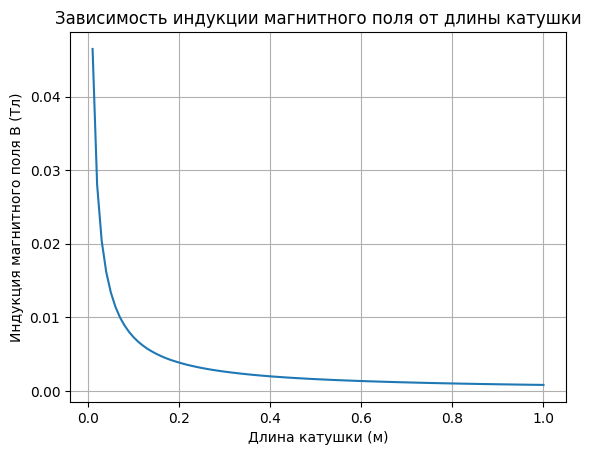

In [32]:
# Построение графика
plt.plot(l_values, B_values)
plt.xlabel('Длина катушки (м)')
plt.ylabel('Индукция магнитного поля B (Тл)')
plt.title('Зависимость индукции магнитного поля от длины катушки')
plt.grid(True)
plt.show()